# Categorical Data

In [1]:
import pandas as pd

In [2]:
days = ["monday", "tuesday", "wednesday", "monday", "sunday", "friday", "saturday", 
        "thursday", "tuesday", "wednesday", "sunday", "saturday", "thursday", "friday"]

In [3]:
from numpy import random

In [4]:
some_data = []
for i in range(len(days)):
    some_data.append(random.randint(100))

In [5]:
df = pd.DataFrame(list(zip(days, some_data)), columns = ["days", "some_data"])

In [6]:
df.head()

,days,some_data
0,monday,23
1,tuesday,68
2,wednesday,68
3,monday,36
4,sunday,72


## Using .map( ) method

In [7]:
dmap = {'sunday':0,'monday':1,'tuesday':2,'wednesday':3,'thursday':4,'friday':5,'saturday':6}
df['days_num'] = df['days'].map(dmap)

In [8]:
df.head()

,days,some_data,days_num
0,monday,23,1
1,tuesday,68,2
2,wednesday,68,3
3,monday,36,1
4,sunday,72,0


In [9]:
yn = ["yes", "no"]

In [10]:
yn_data = []
for i in range(len(df)):
    yn_data.append(random.choice(yn))

In [11]:
df['yn_data'] = yn_data

In [12]:
df.head()

,days,some_data,days_num,yn_data
0,monday,23,1,no
1,tuesday,68,2,no
2,wednesday,68,3,no
3,monday,36,1,yes
4,sunday,72,0,no


## Using .apply( ) method

In [13]:
def zero_one(x):
    if x == "yes":
        return 1
    else:
        return 0

In [14]:
df["yn_data"] = df["yn_data"].apply(zero_one)

In [15]:
df.head()

,days,some_data,days_num,yn_data
0,monday,23,1,0
1,tuesday,68,2,0
2,wednesday,68,3,0
3,monday,36,1,1
4,sunday,72,0,0


## One-Hot Encoding

In [16]:
df_onehot = df.copy()
df_onehot = pd.get_dummies(df_onehot, columns=['days'], prefix = ['days'])

df_onehot.head()

,some_data,days_num,yn_data,days_friday,days_monday,days_saturday,days_sunday,days_thursday,days_tuesday,days_wednesday
0,23,1,0,0,1,0,0,0,0,0
1,68,2,0,0,0,0,0,0,1,0
2,68,3,0,0,0,0,0,0,0,1
3,36,1,1,0,1,0,0,0,0,0
4,72,0,0,0,0,0,1,0,0,0


In [17]:
df_onehot_sklearn = df.copy()

from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
lb_results = lb.fit_transform(df_onehot_sklearn['days'])
lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)

In [18]:
lb_results_df.head()

,friday,monday,saturday,sunday,thursday,tuesday,wednesday
0,0,1,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0


In [19]:
result_df = pd.concat([df_onehot_sklearn, lb_results_df], axis=1)

In [20]:
result_df.head()

,days,some_data,days_num,yn_data,friday,monday,saturday,sunday,thursday,tuesday,wednesday
0,monday,23,1,0,0,1,0,0,0,0,0
1,tuesday,68,2,0,0,0,0,0,0,1,0
2,wednesday,68,3,0,0,0,0,0,0,0,1
3,monday,36,1,1,0,1,0,0,0,0,0
4,sunday,72,0,0,0,0,0,1,0,0,0


In [21]:
some_data_dict = {"some_data1": [], "some_data2": [], "some_data3": []}
for i in range(len(df)):
    some_data_dict["some_data1"].append(random.randn())
    some_data_dict["some_data2"].append(random.randint(1000000))
    some_data_dict["some_data3"].append(random.randint(1000))

In [22]:
df2 = pd.DataFrame(some_data_dict)
df= pd.concat([df, df2], axis =1)

In [23]:
df.head()

,days,some_data,days_num,yn_data,some_data1,some_data2,some_data3
0,monday,23,1,0,-0.152266,895514,863
1,tuesday,68,2,0,1.286945,269147,730
2,wednesday,68,3,0,0.853763,78302,648
3,monday,36,1,1,-0.348201,701444,779
4,sunday,72,0,0,-1.026942,699877,7


# Normalizing

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

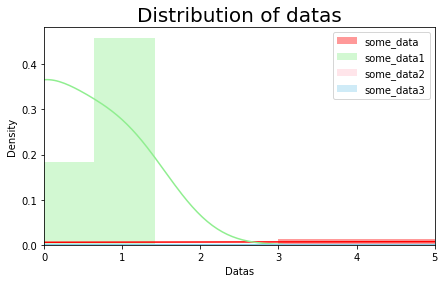

In [25]:
plt.figure(figsize=(7,4))
sns.distplot(df.some_data, label='some_data')
sns.distplot(df.some_data1, label='some_data1')
sns.distplot(df.some_data2, label='some_data2')
sns.distplot(df.some_data3, label='some_data3')
plt.title('Distribution of datas', fontdict={'fontsize': 20})
plt.xlabel('Datas')
plt.xlim(0, 5)
plt.legend()
plt.show()

In [26]:
import numpy as np

In [27]:
df.some_data = np.log(df.some_data)
df.some_data1 = np.log(df.some_data1)
df.some_data2 = np.log(df.some_data2)
df.some_data3 = np.log(df.some_data3)

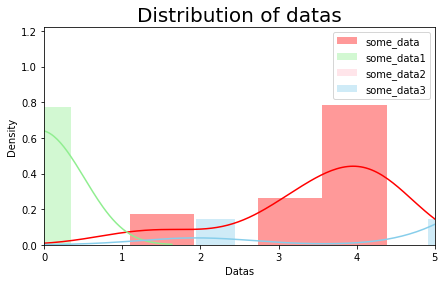

In [28]:
plt.figure(figsize=(7,4))
sns.distplot(df.some_data, label='some_data')
sns.distplot(df.some_data1, label='some_data1')
sns.distplot(df.some_data2, label='some_data2')
sns.distplot(df.some_data3, label='some_data3')
plt.title('Distribution of datas', fontdict={'fontsize': 20})
plt.xlabel('Datas')
plt.xlim(0, 5)
plt.legend()
plt.show()

In [29]:
df.some_data=(df.some_data-df.some_data.min())/(df.some_data.max()-df.some_data.min())
df.some_data1=(df.some_data1-df.some_data1.min())/(df.some_data1.max()-df.some_data1.min())
df.some_data2=(df.some_data2-df.some_data2.min())/(df.some_data2.max()-df.some_data2.min())
df.some_data3=(df.some_data3-df.some_data3.min())/(df.some_data3.max()-df.some_data3.min())

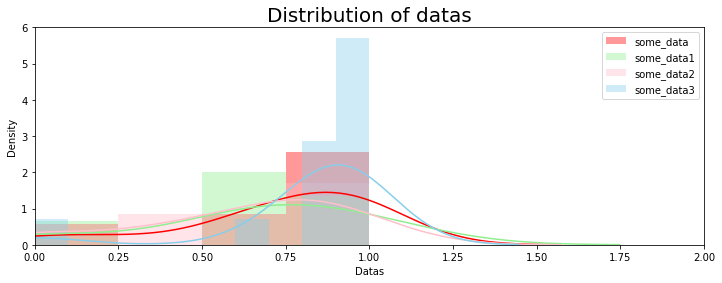

In [33]:
plt.figure(figsize=(12,4))
sns.distplot(df.some_data, label='some_data')
sns.distplot(df.some_data1, label='some_data1')
sns.distplot(df.some_data2, label='some_data2')
sns.distplot(df.some_data3, label='some_data3')
plt.title('Distribution of datas', fontdict={'fontsize': 20})
plt.xlabel('Datas')
plt.xlim(0, 2)
plt.legend()
plt.show()

List comprehension offers a shorter syntax when you want to create a new list based on the values of an existing list.
<br>Example:
<br>Based on a list of fruits, you want a new list, containing only the fruits with the letter "a" in the name. Without list comprehension you will have to write a for statement with a conditional test inside:


In [41]:
fruits = ["apple", "banana", "cherry", "kiwi", "mango"]
newlist = []

for x in fruits:
    if "a" in x:
        newlist.append(x)

newlist

['apple', 'banana', 'mango']

With list comprehension you can do all that with only one line of code:

In [43]:
fruits = ["apple", "banana", "cherry", "kiwi", "mango"]

newlist = [x for x in fruits if "a" in x]
newlist

['apple', 'banana', 'mango']

The condition is like a filter that only accepts the items that valuate to True.
<br> Only accept items that are not "apple":

In [48]:
newlist = [x for x in fruits if x != "apple"]

In [49]:
newlist

['banana', 'cherry', 'kiwi', 'mango']

The condition if x != "apple"  will return True for all elements other than "apple", making the new list contain all fruits except "apple".
<br>
<br>The condition is optional and can be omitted:

In [47]:
newlist = [x for x in fruits]
newlist

['apple', 'banana', 'cherry', 'kiwi', 'mango']

### Iterable
The iterable can be any iterable object, like a list, tuple, set etc.

You can use the range() function to create an iterable:

In [50]:
newlist = [x for x in range(10)]

In [51]:
newlist

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [52]:
newlist = [x for x in range(10) if x < 5]

In [53]:
newlist

[0, 1, 2, 3, 4]

### Expression
The expression is the current item in the iteration, but it is also the outcome, which you can manipulate before it ends up like a list item in the new list:

Set the values in the new list to upper case:

In [54]:
newlist = [x.upper() for x in fruits]

In [55]:
newlist

['APPLE', 'BANANA', 'CHERRY', 'KIWI', 'MANGO']

You can set the outcome to whatever you like:

In [56]:
newlist = ['hello' for x in fruits]

In [57]:
newlist

['hello', 'hello', 'hello', 'hello', 'hello']

The expression can also contain conditions, not like a filter, but as a way to manipulate the outcome:

In [58]:
newlist = [x if x != "banana" else "orange" for x in fruits] #return orange instead of banana

In [59]:
newlist

['apple', 'orange', 'cherry', 'kiwi', 'mango']